# 1.Prepare All Necessary Data

## 1.1 Necessary package


In [14]:
import pandas as pd 
import numpy as np
from ast import literal_eval
import sklearn
# import sklearn.model_selection
from sklearn.model_selection import train_test_split
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

## 1.2 Source Data 

In [15]:
# read csv files
# These files are all datasets from Internet without any modified. 
# We need to format them.

# 1.
# @ df_google_map : the places of interests getten from google_map(there are a lot of types here)
df_google_map = pd.read_csv("data_generated_by_wenjie/final_result_from_googleMap.csv")

# df_transaction = pd.read_csv("Transaction/1508-parkomattransaktioner-august-15.csv",encoding='iso-8859-1',engine='python',sep=';', quotechar='"')

# 2.
# @ df_parkomat contains some data about the parking machines' geo information.
df_parkomat =pd.read_csv("parkomat.csv")


# 3.
# @ df_transaction contains all the parking data during the whole 2015.
import glob
path = r'./Transaction' # use your path
all_files = glob.glob(path + "/*.csv")
df_transaction = pd.concat((pd.read_csv(f, sep=';', encoding='iso-8859-1') for f in all_files))
df_transaction['Dato/tid parkeringsstart'] = pd.to_datetime(df_transaction['Dato/tid parkeringsstart'],format='%d-%m-%Y, %H:%M')
df_transaction['Dato/tid parkeringsslut'] = pd.to_datetime(df_transaction['Dato/tid parkeringsslut'],format='%d-%m-%Y, %H:%M')
df_transaction = df_transaction.sort_values(by='Dato/tid parkeringsstart')

## 1.3 Format these data
### 1.3.1 Get All Types of Google_Map's Locations

In [16]:
# get all the type names
# get all the type names from google_map
location_type = set([])
for i in df_google_map['type']:
    mlist = literal_eval(i)
    for item in mlist:
        location_type.add(item)


# add these types to df (similar to one-hot code)
for i in location_type:
    df_parkomat.insert(len(df_parkomat.columns),i,0)
    df_google_map.insert(len(df_google_map.columns),i,0)

for i in range(len(df_google_map)):
    for type_now in literal_eval(df_google_map.loc[i,'type']):
        df_google_map.loc[i,type_now]=1


In [17]:
df_google_map.head()

name        lat        lng  \
0                      Copenhagen  55.676097  12.568337   
1                   VIK Rengøring  55.708810  12.569768   
2  IP-Support.dk Computerværksted  55.708099  12.573003   
3                     Vintage 199  55.708056  12.570833   
4                    Kan Rep Låse  55.708339  12.569962   

                                                type  accounting  storage  \
0                          ['locality', 'political']           0        0   
1             ['point_of_interest', 'establishment']           0        0   
2             ['point_of_interest', 'establishment']           0        0   
3  ['point_of_interest', 'clothing_store', 'store...           0        0   
4  ['locksmith', 'point_of_interest', 'establishm...           0        0   

   bus_station  insurance_agency  physiotherapist  supermarket  ...  \
0            0                 0                0            0  ...   
1            0                 0                0            0  ...   
2            0                 0                0            0  ...   
3            0                 0                0            0  ...   
4            0                 0                0            0  ...   

   grocery_or_supermarket  secondary_school  electrician  furniture_store  \
0                       0                 0            0                0   
1                       0                 0            0                0   
2                       0                 0            0                0   
3                       0                 0            0                0   
4                       0                 0            0                0   

   moving_company  bakery  florist  laundry  cemetery  restaurant  
0               0       0        0        0         0           0  
1               0       0        0        0         0           0  
2               0       0        0        0         0           0  
3               0       0        0        0         0           0  
4               0       0        0        0         0           0  

[5 rows x 110 columns]

### The types of locations in df_google_map (`location_type`) are following:
> {'accounting',
 'airport',
 'amusement_park',
 'aquarium',
 'art_gallery',
 'atm',
 'bakery',
 'bank',
 'bar',
 'beauty_salon',
 'bicycle_store',
 'book_store',
 'bowling_alley',
 'bus_station',
 'cafe',
 'car_dealer',
 'car_rental',
 'car_repair',
 'car_wash',
 'casino',
 'cemetery',
 'church',
 'city_hall',
 'clothing_store',
 'convenience_store',
 'courthouse',
 'dentist',
 'department_store',
 'doctor',
 'drugstore',
 'electrician',
 'electronics_store',
 'embassy',
 'establishment',
 'finance',
 'fire_station',
 'florist',
 'food',
 'funeral_home',
 'furniture_store',
 'gas_station',
 'general_contractor',
 'grocery_or_supermarket',
 'gym',
 'hair_care',
 'hardware_store',
 'health',
 'home_goods_store',
 'hospital',
 'insurance_agency',
 'jewelry_store',
 'laundry',
 'lawyer',
 'library',
 'liquor_store',
 'local_government_office',
 'locality',
 'locksmith',
 'lodging',
 'meal_delivery',
 'meal_takeaway',
 'mosque',
 'movie_rental',
 'movie_theater',
 'moving_company',
 'museum',
 'natural_feature',
 'night_club',
 'painter',
 'park',
 'parking',
 'pet_store',
 'pharmacy',
 'physiotherapist',
 'place_of_worship',
 'plumber',
 'point_of_interest',
 'police',
 'political',
 'post_office',
 'premise',
 'primary_school',
 'real_estate_agency',
 'restaurant',
 'roofing_contractor',
 'rv_park',
 'school',
 'secondary_school',
 'shoe_store',
 'shopping_mall',
 'spa',
 'stadium',
 'storage',
 'store',
 'sublocality',
 'sublocality_level_1',
 'sublocality_level_2',
 'subway_station',
 'supermarket',
 'tourist_attraction',
 'train_station',
 'transit_station',
 'travel_agency',
 'university',
 'veterinary_care',
 'zoo'}

### 1.3.2 Explore The Basic Info of These 3 Datasets

First datasets `df_transaction`, it contains the :
* 'paying methods'(which does matter in this project)
* 'Vending machine ID'(could be used to connect the `df_transaction` and `df_parkomat` to get the concrete address of this machine) 
* 'Date and hour' is also a very useful info in this datasets, I want to find out the distribution of hour per parking point and the regulation of the time series.
* 'cost' is relatively not that important here

In [18]:
df_transaction.sort_values(by=['Automat','Dato/tid parkeringsstart','Dato/tid parkeringsslut']).head()

Sættype Betalingsmåde  Automat Lokation   Zone  \
676   Betaling        Mønter      152      NaN  ? - ?   
1130  Betaling        Mønter      152      NaN  ? - ?   
1283  Betaling        Mønter      152      NaN  ? - ?   
2967  Betaling  VISA Dankort      152      NaN  ? - ?   
3002  Betaling        Mønter      152      NaN  ? - ?   

     Dato/tid parkeringsstart Dato/tid parkeringsslut       Beløb  \
676       2015-01-01 18:05:00     2015-01-02 08:02:00    1,00 DKK   
1130      2015-01-01 23:41:00     2015-01-02 08:02:00    1,00 DKK   
1283      2015-01-02 05:18:00     2015-01-02 12:08:00  124,00 DKK   
2967      2015-01-02 09:35:00     2015-01-02 10:45:00   35,00 DKK   
3002      2015-01-02 09:36:00     2015-01-02 14:56:00  160,00 DKK   

     Kreditkortgebyr  
676         0,00 DKK  
1130        0,00 DKK  
1283        0,00 DKK  
2967        0,50 DKK  
3002        0,00 DKK

Second datasets `df_parkomat`, we would  use the 'parkomat_id' to connect it with `df_transaction`.
There are a lot of columns of location types added above. They are used to calculate how much points are within a radius(which could be set by hand)

In [19]:
df_parkomat.head()

FID   id  parkomat_id              type  vejkode p_zone beboer_zone  \
0  parkomat.1  467          152            P-info   1396.0    Rød          IB   
1  parkomat.2  466          153  Betalingsautomat   1396.0    Rød          IB   
2  parkomat.3  470          156  Betalingsautomat    148.0    Rød          IB   
3  parkomat.4  471          157  Betalingsautomat   3348.0    Rød          IB   
4  parkomat.5  472          158            P-info   5220.0    Rød          IB   

                    vejnavn husnr              placering  ...  \
0                    Dyrkøb     5                    NaN  ...   
1                    Dyrkøb  OF/3                    NaN  ...   
2  H.C. Andersens Boulevard     9  Eksisterende fortovsø  ...   
3             Jarmers Plads     7  Eksisterende fortovsø  ...   
4            Nørre Voldgade  OF/6                    NaN  ...   

   grocery_or_supermarket secondary_school electrician furniture_store  \
0                       0                0           0               0   
1                       0                0           0               0   
2                       0                0           0               0   
3                       0                0           0               0   
4                       0                0           0               0   

   moving_company  bakery  florist  laundry  cemetery  restaurant  
0               0       0        0        0         0           0  
1               0       0        0        0         0           0  
2               0       0        0        0         0           0  
3               0       0        0        0         0           0  
4               0       0        0        0         0           0  

[5 rows x 120 columns]

In [20]:
df_google_map.head()

name        lat        lng  \
0                      Copenhagen  55.676097  12.568337   
1                   VIK Rengøring  55.708810  12.569768   
2  IP-Support.dk Computerværksted  55.708099  12.573003   
3                     Vintage 199  55.708056  12.570833   
4                    Kan Rep Låse  55.708339  12.569962   

                                                type  accounting  storage  \
0                          ['locality', 'political']           0        0   
1             ['point_of_interest', 'establishment']           0        0   
2             ['point_of_interest', 'establishment']           0        0   
3  ['point_of_interest', 'clothing_store', 'store...           0        0   
4  ['locksmith', 'point_of_interest', 'establishm...           0        0   

   bus_station  insurance_agency  physiotherapist  supermarket  ...  \
0            0                 0                0            0  ...   
1            0                 0                0            0  ...   
2            0                 0                0            0  ...   
3            0                 0                0            0  ...   
4            0                 0                0            0  ...   

   grocery_or_supermarket  secondary_school  electrician  furniture_store  \
0                       0                 0            0                0   
1                       0                 0            0                0   
2                       0                 0            0                0   
3                       0                 0            0                0   
4                       0                 0            0                0   

   moving_company  bakery  florist  laundry  cemetery  restaurant  
0               0       0        0        0         0           0  
1               0       0        0        0         0           0  
2               0       0        0        0         0           0  
3               0       0        0        0         0           0  
4               0       0        0        0         0           0  

[5 rows x 110 columns]

### 1.3.3 Explore more basic info in these datasets

Firstly I explore the dataset df_google_map.There are 21470 rows of places data. But what matters is every place would have multi tags.
According to the summary of df_google_map,the number of 'establishment' is 21454 and the number of 'point_of_interest' is also 21454. 

What's more, there are also tags like 'bus station','subway_station' and 'transit station'. Some 'railway station' would result in the rise of parking counts but the 'bus station' and 'subway_station' would result in the decrease of that. It is a meaningful point which we could study with our data.



In [21]:
df_google_map_points_count = df_google_map[location_type].apply(sum)
print(df_google_map_points_count)
# print(len(df_google_map))

accounting           92
storage              37
bus_station          67
insurance_agency     33
physiotherapist      49
                   ... 
bakery               76
florist              32
laundry              25
cemetery             11
restaurant          660
Length: 106, dtype: int64


### 1.3.3 Calculate the number of various types of points within a certain range 

#### Firstly, the function of calculate the distance with lat and lng.

In [22]:
# now try to counting the number of different type points 
# copenhagen : lat:55.6761° N,  lng: 12.5683° E
from math import radians, cos, sin, asin, sqrt
def geodistance(lng1,lat1,lng2,lat2):
    lng1, lat1, lng2, lat2 = map(radians, [lng1, lat1, lng2, lat2])
    dlon=lng2-lng1
    dlat=lat2-lat1
    a=sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2 
    dis=2*asin(sqrt(a))*6371*1000
    return dis


RADIUS = 300
## =========================================================BEGINNING==========================================================
## the following codes are used to calculate the amount of different types of location within a concrete raidus here
## it takes too long time to run, so I saved the result as a csv file. Only need to read the csv file we could get the result
#
#
# df_parkomat_count = df_parkomat.copy()
# # df_parkomat_count.insert(0,'Count_radius_300m',0)
# list_column_parkomat_count = location_type.copy()
# list_column_parkomat_count.add('wkb_geometry')
# list_column_parkomat_count.add('['parkomat_id']')
# df_parkomat_count = df_parkomat_count[list_column_parkomat_count]
# # df_parkomat_count['wkb_geometry']
# df_parkomat_count['lng']  = df_parkomat_count['wkb_geometry'].map(lambda x:(re.split('POINT \(| |\)',x)[1]))
# df_parkomat_count['lat']  = df_parkomat_count['wkb_geometry'].map(lambda x:(re.split('POINT \(| |\)',x)[2]))


# for j in range(len(df_parkomat_count)):
#     print(j)
#     list_index_find = []
#     for i in range(len(df_google_map)):
#         distance = geodistance(df_google_map[i:i+1]['lng'],df_google_map[i:i+1]['lat'],df_parkomat_count[j:j+1]['lng'],df_parkomat_count[j:j+1]['lat'])
#         if(distance <= RADIUS):
#             list_index_find.append(i)
#     df_parkomat_count.loc[j,location_type]=df_google_map.loc[list_index_find,location_type].sum()
#     if(j%100==0):
#         df_parkomat_count.to_csv('df_parkomat_count_300m.csv')

# df_parkomat_count.to_csv('df_parkomat_count_300m.csv')

## =============================================================END===============================================================
df_parkomat_count = pd.read_csv("data_generated_by_wenjie/df_parkomat_count_300m.csv",index_col=0)
df_parkomat_count = df_parkomat_count.drop_duplicates(['parkomat_id'])



Now the `df_parkmot_count` contains the count of every type within a certain radius(300m)

In [23]:
df_parkomat_count.head()

book_store  supermarket  church  hair_care  shoe_store  bicycle_store  \
0           3            0       2          1           1              1   
1           4            0       2          1           1              1   
2           1            1       0          1           2              1   
3           1            1       0          1           2              1   
4           1            0       1          1           2              1   

   local_government_office  primary_school   id  sublocality_level_2  ...  \
0                        0               0  467                    0  ...   
1                        0               0  466                    0  ...   
2                        3               0  470                    0  ...   
3                        4               0  471                    0  ...   
4                        4               0  472                    0  ...   

   car_wash  electrician  beauty_salon  drugstore  aquarium  police  \
0         0            0             0          0         0       0   
1         0            0             0          0         0       0   
2         0            0             2          0         0       0   
3         0            0             4          0         0       0   
4         0            0             4          0         0       0   

   roofing_contractor        lng        lat  parkomat_id  
0                   0  12.572666  55.679003          152  
1                   0  12.572937  55.679216          153  
2                   0  12.566108  55.677827          156  
3                   0  12.565577  55.678517          157  
4                   0  12.566308  55.679171          158  

[5 rows x 111 columns]

### 1.3.4 Working with the `df_transaction`
`df_transaction` is really an important dataset.


In [24]:
# Firstly I sort the transaction data by the id of the machine and the start time.
df_transaction_temp = df_transaction.sort_values(by=['Automat','Dato/tid parkeringsstart','Dato/tid parkeringsslut'])

# Then filter all the dirty data.
df_transaction_now_using = df_transaction_temp[(df_transaction_temp['Dato/tid parkeringsslut']-df_transaction_temp['Dato/tid parkeringsstart'])>=pd.Timedelta(0,'s')]

# Then calculate the minutes of stopping 
df_transaction_now_using.loc[:,'diff_time'] = (df_transaction_now_using['Dato/tid parkeringsslut'] - df_transaction_now_using['Dato/tid parkeringsstart']).dt.seconds/60
df_transaction_now_using.loc[:,'start_hour'] = df_transaction_now_using['Dato/tid parkeringsstart'].dt.hour
df_transaction_now_using.loc[:,'leave_hour'] = df_transaction_now_using['Dato/tid parkeringsslut'].dt.hour

df_transaction_now_using.head()

D:\Development_tool\anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
D:\Development_tool\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


Sættype Betalingsmåde  Automat Lokation   Zone  \
676   Betaling        Mønter      152      NaN  ? - ?   
1130  Betaling        Mønter      152      NaN  ? - ?   
1283  Betaling        Mønter      152      NaN  ? - ?   
2967  Betaling  VISA Dankort      152      NaN  ? - ?   
3002  Betaling        Mønter      152      NaN  ? - ?   

     Dato/tid parkeringsstart Dato/tid parkeringsslut       Beløb  \
676       2015-01-01 18:05:00     2015-01-02 08:02:00    1,00 DKK   
1130      2015-01-01 23:41:00     2015-01-02 08:02:00    1,00 DKK   
1283      2015-01-02 05:18:00     2015-01-02 12:08:00  124,00 DKK   
2967      2015-01-02 09:35:00     2015-01-02 10:45:00   35,00 DKK   
3002      2015-01-02 09:36:00     2015-01-02 14:56:00  160,00 DKK   

     Kreditkortgebyr  diff_time  start_hour  leave_hour  
676         0,00 DKK      837.0          18           8  
1130        0,00 DKK      501.0          23           8  
1283        0,00 DKK      410.0           5          12  
2967        0,50 DKK       70.0           9          10  
3002        0,00 DKK      320.0           9          14

In [25]:
# Then Calculate the counts of starting and leaving per hour.

df_transaction_start_hour_count = df_transaction_now_using.groupby(['start_hour','Automat']).size().reset_index(name='counts')
df_transaction_start_hour_count = df_transaction_start_hour_count.rename(columns={"Automat":"parkomat_id"})


df_transaction_leave_hour_count = df_transaction_now_using.groupby(['leave_hour','Automat']).size().reset_index(name='counts')
df_transaction_leave_hour_count = df_transaction_leave_hour_count.rename(columns={"Automat":"parkomat_id"})

# df_transaction_start_hour_count[df_transaction_start_hour_count['start_hour']==0]


In [26]:
## This sector is used to calculate how many cars parking in every park per hour.(Different from above module.)
## ============================================BEGIN===========================
# time = pd.to_datetime("2015-01-01 00:00:00")
# df_transaction_hour_series =pd.DataFrame({'Automat':[],'counts':[],'datetime':[]})
# while time<pd.to_datetime("2016-01-01 00:00:00"):
#     temp = df_transaction[(df_transaction['Dato/tid parkeringsstart']<=time+pd.Timedelta(1,'h'))&(df_transaction['Dato/tid parkeringsslut']>=time)].groupby(['Automat']).size().reset_index(name='counts')
#     temp['datetime'] = time
#     time = time + pd.Timedelta(1,'h')
#     df_transaction_hour_series = df_transaction_hour_series.append(temp)
#     print(time)
## ====================================END=================================
df_transaction_hour_series = pd.read_csv("data_generated_by_wenjie/df_transaction_hour_series.csv",usecols=['Automat','counts','datetime'],parse_dates=['datetime'])

In [29]:
# Then calculate the percentage of parking using 
## ====================================BEGINNING===========================
# series_max_parking_count = df_transaction_hour_series.groupby(['Automat']).max().reset_index('Automat')
# series_max_parking_count = series_max_parking_count[['Automat','counts']]
# series_max_parking_count.rename(columns={'counts':'max_counts'},inplace=True)

# df_transaction_hour_series = df_transaction_hour_series.merge(series_max_parking_count,how='inner',on='Automat')
# df_transaction_hour_series['rate'] = df_transaction_hour_series['counts']/df_transaction_hour_series['max_counts']
# df_transaction_hour_series.to_csv('data_generated_by_wenjie/df_transaction_hour_series_with_rate.csv')
## ==================================ENDING================================
df_transaction_hour_series = pd.read_csv('data_generated_by_wenjie/df_transaction_hour_series_with_rate.csv',usecols=['Automat','counts','datetime','max_counts','rate'],parse_dates=['datetime'])

# 2.Outline of Story
## 2.1 Basic Info Visualization
### 2.1.1 The Distribution of Machines

The first map is the distribution of Machines on 2015-05-21 00:00:00.
The color represents the occupancy ranting.
Then according to the change of time, it is clear that not every


In [30]:
import folium
from folium import plugins
import re
import colorsys

# @ datetime_using: the time you want to show. Its format is 'xxxx-xx-xx xx:00:00'.It will show how many cars are parking in every point per hour.(For example, if it is 15:00:00, it shows the amount during 15-16)
# @ triple_rate: Sometimes (6:00) all parking points shows green if you just show it's true value. If we make the rate*3,the comparsion would be more clear.
def draw_parking_rate_according_to_datetime(datetime_using,triple_rate=False):
    df_transaction_temp = df_transaction_hour_series[df_transaction_hour_series['datetime']==datetime_using].merge(df_parkomat_count,how='inner',left_on='Automat',right_on='parkomat_id')
    cp_map = folium.Map(location=[55.687097, 12.579338], zoom_start=12.5)
    for i in range(len(df_transaction_temp)):
        rate = int(df_transaction_temp[i:i+1]['rate']*100)
        if triple_rate:
            rate = rate*2
        if rate > 100:
            rate = 100
        rgb = colorsys.hsv_to_rgb((100 -rate)/ 300., 1.0, 1.0)
        color = '#%02x%02x%02x' % tuple([round(255*x) for x in rgb])
        # '#%02x%02x%02x' % tuple([round(255*x) for x in (colorsys.hsv_to_rgb((100 -rate)/ 300., 1.0, 1.0)))])
        folium.Circle(
            radius=5,
            location=[df_transaction_temp[i:i+1]['lat'], df_transaction_temp[i:i+1]['lng']],
            color=color,
            fill=True
        ).add_to(cp_map)
    return cp_map

# get a time you want
datetime_using = pd.to_datetime("2015-05-21 00:00:00")
# draw all the point
cp_map = draw_parking_rate_according_to_datetime(datetime_using,True)
cp_map

 Here we generate a GIF to Show the general trend of that day on webpage.


### 2.1.2 The visualization of Geo info from google_map
Points with different colors represent different types of types.

In [31]:
# This section is used to generate different color according to string
# I want to draw all the points from google_map on the same map. So we could use different colors to determine different types.
# For example, the string "['food','book']" would be yellow and string "['shop','station']" would be green.
import hashlib

def hsv2rgb(h, s, v):
    h += 0.618033988749895
    h %= 1
    h_i = int(h*6)
    f = h*6 - h_i
    p = v * (1 - s)
    q = v * (1 - f*s)
    t = v * (1 - (1 - f) * s)

    if h_i == 0:
        r, g, b = v, t, p
    elif h_i == 1:
        r, g, b = q, v, p
    elif h_i == 2:
        r, g, b = p, v, t
    elif h_i == 3:
        r, g, b = p, q, v
    elif h_i == 4:
        r, g, b = t, p, v
    elif h_i == 5:
        r, g, b = v, p, q
    else:
        r = g = b = 0
    return [int(r*256), int(g*256), int(b*256)]

def str2rgb(obj):
    digest = hashlib.sha384(str(obj).encode('utf-8')).hexdigest()

    sub_size = int(len(digest) / 3)
    max_value = float(int("f" * sub_size, 16))
    digests = [digest[i * sub_size: (i + 1) * sub_size] for i in range(3)]

    rgb = (((int(d, 16) / max_value)+0.618033988749895) % 1 for d in digests)

    return '#' + ''.join(["%02x" % int(c*255 + 0.5 - 0.0000005) for c in rgb])

def str2rgb2(obj):
    digest = hashlib.sha384(str(obj).encode('utf-8')).hexdigest()

    obj_value = int(digest, 16)
    max_value = float(int("f" * len(digest), 16))

    rgb = hsv2rgb(obj_value/max_value, 0.5, 0.95)

    return '#' + ''.join(["%02x" % c for c in rgb])

In [32]:
# here I show all the points from google_map
def draw_map_with_google_map_points():
    cp_map = folium.Map(location=[55.6760968, 12.5683371], zoom_start=13)
    for i in range(len(df_google_map)):
        if not str(df_google_map.loc[i,'type'])=="[\'point_of_interest\', \'establishment\']":
            folium.Circle(
            radius=3,
            location=[df_google_map.loc[i,'lat'], df_google_map.loc[i,'lng']],
            color=str2rgb2(str(df_google_map.loc[i,'type'])),
            fill=True
        ).add_to(cp_map)
    return cp_map


### 2.1.3 Analysis Time-Series Trends of Every Parking 

In [33]:
# Here I calculate average value per hour of every parking point.
df_transaction_hour_series['hour'] = df_transaction_hour_series['datetime'].dt.hour
df_transaction_hour_series_avarage =df_transaction_hour_series.groupby(by=['Automat','hour']).mean().reset_index(['Automat','hour'])

Firstly we grasp some points which gather together and paint them on the map.



In [80]:
# list_chosen_point = [[2180,4384,4383,4381,4382,3595,2185,4357,2182],
# [1002.0,1003.0, 1004.0, 1005.0, 1006.0, 1007.0, 1008.0, 1009.0, 1010.0, 1011.0, 1012.0],
# [2379,2380,2377,2376,2583,2381,2382,2375,2387,2388],
# [2121.0, 2122.0, 2123.0, 2124.0, 2125.0, 2126.0, 2127.0, 2128.0, 2129.0, 2130.0, 2131.0, 2132.0, 2133.0, 2134.0],
# [3001.0, 3002.0, 3003.0, 3004.0, 3005.0, 3006.0, 3007.0, 3008.0, 3009.0, 3010.0],
# [8196,8195,8154,8157,8158,8199,8201,8155,8156,8202]]
# p_map = draw_map_with_google_map_points()
# list_of_color = ['black','red','blue','green','pink','orange']
# count = 0
# for i in list_chosen_point:
#     for j in i:
#         folium.Marker(
#         location=[df_parkomat_count[df_parkomat_count['parkomat_id']==j].lat, df_parkomat_count[df_parkomat_count['parkomat_id']==j].lng],
#         popup=j,
#         icon=folium.Icon(color=list_of_color[count])
# ).add_to(cp_map)
#     count=count+1
# cp_map.save("12_points")

# import random
# list_temp = list(df_transaction_hour_series_avarage.Automat.drop_duplicates())
# random.seed(10)
# list_temp = random.sample(list_temp, 12)


list_of_color=['pink', 'darkpurple', 'lightred', 'orange', 'darkred', 'lightblue', 'darkblue', 'black', 'red', 'purple', 'blue', 'darkgreen', 'lightgray', 'cadetblue', 'white', 'green', 'beige', 'lightgreen', 'gray']
list_chosen_point = [4432.0,
 1070.0,
 4049.0,
 4185.0,
 4446.0,
 1025.0,
 2479.0,
 4141.0,
 4209.0,
 3023.0,
 8127.0,
 2380.0]

#line_smooth.html
cp_map = draw_map_with_google_map_points()
count = 0
for j in list_chosen_point:
    html="""
   <div id="page1">
<iframe align="center" width="100%" height="600" src="https://gggdttt.github.io/line_smooth.html"  frameborder="no" border="0" marginwidth="0" marginheight="0" scrolling="no"></iframe>
   </div>
        """
    iframe = folium.IFrame(html=html, width=600, height=600)
    popup = folium.Popup(iframe, max_width=2650)
    folium.Marker(
        location=[df_parkomat_count[df_parkomat_count['parkomat_id']==j].lat, df_parkomat_count[df_parkomat_count['parkomat_id']==j].lng],
        popup=popup,
        # popup=list(df_parkomat[df_parkomat['parkomat_id']==j].vejnavn)[0],
        # icon=folium.Icon(color=list_of_color[count])
        icon=folium.Icon(color=list_of_color[count])
        ).add_to(cp_map)
    count=count+1


# 
cp_map.save("12_points---1.html")
cp_map
#

In [38]:
m = folium.Map([43,-100], zoom_start=4)

html="""
    <h1> This is a big popup</h1><br>
    With a few lines of code...
    <p>
    <code>
        from numpy import *<br>
        exp(-2*pi)
    </code>
    </p>
    """
iframe = folium.element.IFrame(html=html, width=500, height=300)
popup = folium.Popup(iframe, max_width=2650)

folium.Marker([30,-100], popup=popup).add_to(m)

m

AttributeError: module 'folium' has no attribute 'element'

In [1]:
import pyecharts.options as opts
from pyecharts.charts import Line
from pyecharts.faker import Faker

c = (
    Line()
    .add_xaxis(Faker.choose())
    .add_yaxis("商家A", Faker.values(), is_smooth=True)
    .add_yaxis("商家B", Faker.values(), is_smooth=True)
    .set_global_opts(title_opts=opts.TitleOpts(title="Line-smooth"))
    .render("line_smooth.html")
)

In [20]:
# df_parkomat_count[df_parkomat_count['parkomat_id'].isin(list_chosen_point)]
df_transaction_hour_series_avarage_chosen_point= df_transaction_hour_series_avarage[df_transaction_hour_series_avarage['Automat'].isin(list_chosen_point)]
df_transaction_hour_series_avarage_chosen_point = df_transaction_hour_series_avarage_chosen_point.merge(df_parkomat[['parkomat_id','vejnavn']],left_on='Automat', right_on="parkomat_id",how='left')
# df_transaction_hour_series_avarage_chosen_point.merge(df_parkomat[['parkomat_id','vejnavn']],left_on='Automat', right_on="parkomat_id",how='left').to_csv('12_points')

Now try to draw the figure of regression results according to the 24 hours.

In [21]:
# from scipy import stats
# figure, ax = plt.subplots(nrows=22,ncols=3,figsize=(20,100))
# figure.tight_layout(h_pad=2.0)
# df = df_transaction_hour_series_avarage_chosen_point
# k = 0
# for i in range(len(list_chosen_point)):
#     for j in range(i,len(list_chosen_point)):
#         if i != j:
#             plt.subplot(22, 3, k+1)
#             plt.xlabel(list_chosen_point[i])
#             plt.ylabel(list_chosen_point[j])
#             plt.xticks([])
#             plt.yticks([])

#             df_now_drawing_x = df[df['Automat']==list_chosen_point[i]].loc[:,'counts']
#             df_now_drawing_y = df[df['Automat']==list_chosen_point[j]].loc[:,'counts']
#             plt.scatter(df_now_drawing_x,df_now_drawing_y)
            
#             k = k+1




Automat  weekHour     counts  max_counts_x
0         152.0         0  16.500000          38.0
1         152.0         1  16.538462          38.0
2         152.0         2  16.538462          38.0
3         152.0         3  16.557692          38.0
4         152.0         4  16.576923          38.0
...         ...       ...        ...           ...
254232  69693.0       107   5.000000          33.0
254233  69693.0       108   6.000000          33.0
254234  69693.0       109   7.600000          33.0
254235  69693.0       110   2.500000          33.0
254236  69693.0       133   1.000000          33.0

[254237 rows x 4 columns]

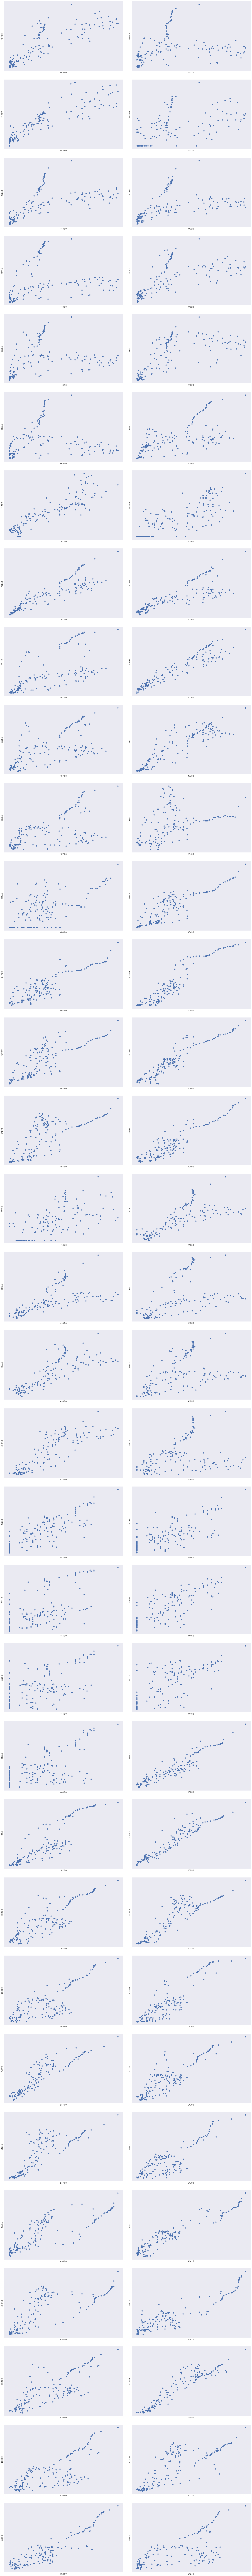

In [48]:
df[df['Automat']==1070].loc[:,'counts']
df = df_transaction_hour_series
df['weekHour'] = df['datetime'].dt.weekday*24+df['datetime'].dt.hour
df = df[['Automat','weekHour','counts','max_counts_x']].groupby(by=['Automat','weekHour']).mean().reset_index(['Automat','weekHour'])



from scipy import stats
figure, ax = plt.subplots(nrows=33,ncols=2,figsize=(20,200))
figure.tight_layout(h_pad=2.0)
k = 0
for i in range(len(list_chosen_point)):
    for j in range(i,len(list_chosen_point)):
        if i != j:
            plt.subplot(33, 2, k+1)
            plt.xlabel(list_chosen_point[i])
            plt.ylabel(list_chosen_point[j])
            plt.xticks([])
            plt.yticks([])

            df_now_drawing_x = df[df['Automat']==list_chosen_point[i]].loc[:,'counts']
            df_now_drawing_y = df[df['Automat']==list_chosen_point[j]].loc[:,'counts']
            plt.scatter(df_now_drawing_x,df_now_drawing_y)
            
            k = k+1


Then we plot the count and the number of every point chosen. 

In [22]:

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# figure, ax = plt.subplots(nrows=153,ncols=2,figsize=(10,500))
# figure, ax = plt.subplots(nrows=6,ncols=2,figsize=(12,28))
# count = 0
# # for i in list(df_transaction_hour_series_avarage['Automat'].drop_duplicates()):
# ax[0,0].set_title('Count of Every Park')
# ax[0,1].set_title('Rate of Every Park')
# for i in list_chosen_point:
#     for j in i:
#         ax[count,0].plot(list(df_transaction_hour_series_avarage[df_transaction_hour_series_avarage['Automat']==j]['counts']))
#         ax[count,1].plot(list(df_transaction_hour_series_avarage[df_transaction_hour_series_avarage['Automat']==j]['rate']))
#         ax[count,0].set_xlabel('Hour')
#         ax[count,0].set_ylabel('Count')
#         ax[count,1].set_xlabel('Hour')
#         ax[count,1].set_ylabel('Parking Rate')
#     count = count + 1 

# figure, ax = plt.subplots(nrows=153,ncols=2,figsize=(10,500))
figure, ax = plt.subplots(nrows=2,ncols=2,figsize=(12,12))
# for i in list(df_transaction_hour_series_avarage['Automat'].drop_duplicates()):
ax[0,0].set_title('Count of Every Park')
ax[0,1].set_title('Rate of Every Park')
for i in list_chosen_point:
    for j in i:
        ax[0,0].plot(list(df_transaction_hour_series_avarage[df_transaction_hour_series_avarage['Automat']==j]['counts']))
        ax[0,1].plot(list(df_transaction_hour_series_avarage[df_transaction_hour_series_avarage['Automat']==j]['rate']))
        ax[0,0].set_xlabel('Hour')
        ax[0,0].set_ylabel('Count')
        ax[0,1].set_xlabel('Hour')
        ax[0,1].set_ylabel('Parking Rate')      

TypeError: 'float' object is not iterable

According to the figures,some parking lots closed to each other show similar trends on both rate and count, but some also show  different trends.
So which factors would result in these differences?

In [26]:
# from pyecharts import options as opts
# from pyecharts.charts import Map3D
# from pyecharts.globals import ChartType
# from pyecharts.commons.utils import JsCode

# example_data = [
#     ("黑龙江", [127.9688, 45.368, 100]),
#     ("内蒙古", [110.3467, 41.4899, 300]),
#     ("吉林", [125.8154, 44.2584, 300]),
#     ("辽宁", [123.1238, 42.1216, 300]),
#     ("河北", [114.4995, 38.1006, 300]),
#     ("天津", [117.4219, 39.4189, 300]),
#     ("山西", [112.3352, 37.9413, 300]),
#     ("陕西", [109.1162, 34.2004, 300]),
#     ("甘肃", [103.5901, 36.3043, 300]),
#     ("宁夏", [106.3586, 38.1775, 300]),
#     ("青海", [101.4038, 36.8207, 300]),
#     ("新疆", [87.9236, 43.5883, 300]),
#     ("西藏", [91.11, 29.97, 300]),
#     ("四川", [103.9526, 30.7617, 300]),
#     ("重庆", [108.384366, 30.439702, 300]),
#     ("山东", [117.1582, 36.8701, 300]),
#     ("河南", [113.4668, 34.6234, 300]),
#     ("江苏", [118.8062, 31.9208, 300]),
#     ("安徽", [117.29, 32.0581, 300]),
#     ("湖北", [114.3896, 30.6628, 300]),
#     ("浙江", [119.5313, 29.8773, 300]),
#     ("福建", [119.4543, 25.9222, 300]),
#     ("江西", [116.0046, 28.6633, 300]),
#     ("湖南", [113.0823, 28.2568, 300]),
#     ("贵州", [106.6992, 26.7682, 300]),
#     ("广西", [108.479, 23.1152, 300]),
#     ("海南", [110.3893, 19.8516, 300]),
#     ("上海", [121.4648, 31.2891, 1300]),
# ]

# c = (
#     Map3D()
#     .add_schema(
#         itemstyle_opts=opts.ItemStyleOpts(
#             color="rgb(5,101,123)",
#             opacity=1,
#             border_width=0.8,
#             border_color="rgb(62,215,213)",
#         ),
#         map3d_label=opts.Map3DLabelOpts(
#             is_show=False,
#             formatter=JsCode("function(data){return data.name + " " + data.value[2];}"),
#         ),
#         emphasis_label_opts=opts.LabelOpts(
#             is_show=False,
#             color="#fff",
#             font_size=10,
#             background_color="rgba(0,23,11,0)",
#         ),
#         light_opts=opts.Map3DLightOpts(
#             main_color="#fff",
#             main_intensity=1.2,
#             main_shadow_quality="high",
#             is_main_shadow=False,
#             main_beta=10,
#             ambient_intensity=0.3,
#         ),
#     )
#     .add(
#         series_name="bar3D",
#         data_pair=example_data,
#         type_=ChartType.BAR3D,
#         bar_size=1,
#         shading="lambert",
#         label_opts=opts.LabelOpts(
#             is_show=False,
#             formatter=JsCode("function(data){return data.name + ' ' + data.value[2];}"),
#         ),
#     )
#     .set_global_opts(title_opts=opts.TitleOpts(title="Map3D-Bar3D"))
#     .render("map3d_with_bar3d.html")
# )
# c

## 2.2 Explore potentional factors

First of all, let's see the following map:

We could easily find that on this map there are a lot of different types of locations around the green markers(i.e. the parking area).
So we could try to calculate the number of different types of locations within a radius(300m in our project) to explore the influences.

In [27]:
# a = df_parkomat_count.lat.drop_duplicates()
# len(df_parkomat_count.parkomat_id)
# len(df_parkomat_count.parkomat_id.drop_duplicates())
# df_parkomat.loc[187:188]data.drop_duplicates(['k2'])
# point_index_list = list(df_parkomat_count['parkomat_id'].drop_duplicates())
# df_parkomat_count[df_parkomat_count['parkomat_id']==3094]
# point_index_list

In [28]:
# cp_map = draw_map_with_google_map_points()
# point_index_list = list(df_parkomat_count['parkomat_id'].drop_duplicates())
# for j in point_index_list:
#     folium.Marker(
#     location=[df_parkomat_count[df_parkomat_count['parkomat_id']==j].lat, df_parkomat_count[df_parkomat_count['parkomat_id']==j].lng],
#         popup=j,
#     icon=folium.Icon(color="green")
# ).add_to(cp_map)
# cp_map

Then we will use the Random Forests to prophet the results.

In [29]:
df_random_forest = df_transaction_hour_series_avarage[['Automat','hour','rate']]
# Get one hot encoding of columns B
one_hot = pd.get_dummies(df_random_forest['hour'])
# Drop column B as it is now encoded
df_random_forest = df_random_forest.drop('hour',axis = 1)
# Join the encoded df
df_random_forest = df_random_forest.join(one_hot)
df_random_forest = df_random_forest.merge(df_parkomat_count,how = 'inner',left_on ='Automat',right_on='parkomat_id')
df_random_forest.drop('parkomat_id',axis=1)

Automat      rate  0  1  2  3  4  5  6  7  ...  gym  car_wash  \
0        152.0  0.245343  1  0  0  0  0  0  0  0  ...    0         0   
1        152.0  0.237295  0  1  0  0  0  0  0  0  ...    0         0   
2        152.0  0.233484  0  0  1  0  0  0  0  0  ...    0         0   
3        152.0  0.224083  0  0  0  1  0  0  0  0  ...    0         0   
4        152.0  0.211088  0  0  0  0  1  0  0  0  ...    0         0   
...        ...       ... .. .. .. .. .. .. .. ..  ...  ...       ...   
35433   9625.0  0.211312  0  0  0  0  0  0  0  0  ...    2         0   
35434   9625.0  0.209009  0  0  0  0  0  0  0  0  ...    2         0   
35435   9625.0  0.212255  0  0  0  0  0  0  0  0  ...    2         0   
35436   9625.0  0.207107  0  0  0  0  0  0  0  0  ...    2         0   
35437   9625.0  0.209605  0  0  0  0  0  0  0  0  ...    2         0   

       electrician  beauty_salon  drugstore  aquarium  police  \
0                0             0          0         0       0   
1                0             0          0         0       0   
2                0             0          0         0       0   
3                0             0          0         0       0   
4                0             0          0         0       0   
...            ...           ...        ...       ...     ...   
35433            0             0          0         0       0   
35434            0             0          0         0       0   
35435            0             0          0         0       0   
35436            0             0          0         0       0   
35437            0             0          0         0       0   

       roofing_contractor        lng        lat  
0                       0  12.572666  55.679003  
1                       0  12.572666  55.679003  
2                       0  12.572666  55.679003  
3                       0  12.572666  55.679003  
4                       0  12.572666  55.679003  
...                   ...        ...        ...  
35433                   0  12.567071  55.691890  
35434                   0  12.567071  55.691890  
35435                   0  12.567071  55.691890  
35436                   0  12.567071  55.691890  
35437                   0  12.567071  55.691890  

[35438 rows x 136 columns]

In [30]:
def randomForest(X,y,X_test,y_test):
# Instantiate model with 1000 decision trees
    rf = RandomForestRegressor(n_estimators = 300, random_state = 40)
# Train the model on training data
    rf.fit(X, y)
#test 
    predictions = rf.predict(X_test)
# Calculate the absolute errors
    errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
    print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
# Calculate mean absolute percentage error (MAPE)
    mape = 100 * (errors / y_test)
# Calculate and display accuracy
    accuracy = 100 - np.mean(mape)
    print('Accuracy:', round(accuracy, 2), '%.')
    return rf
# ###############################################################
train = df_random_forest.drop(
        columns=['Automat','parkomat_id','rate',
        'id',
        'lng',
        'lat',
        'sublocality_level_2',
        'sublocality_level_1',
        'sublocality',
        'establishment',
        'point_of_interest',
        'wkb_geometry'])
target = df_random_forest['rate']
X,X_test, y, y_test = sklearn.model_selection.train_test_split(train,target,train_size = int(len(train)*0.9),random_state = 0)
res =  randomForest(X,y,X_test,y_test)


Mean Absolute Error: 0.02 degrees.
Accuracy: 89.69 %.


In [31]:
train = df_random_forest.drop(
        columns=['Automat','parkomat_id','rate',
        'id',
        'lng',
        'lat',
        'sublocality_level_2',
        'sublocality_level_1',
        'sublocality',
        'establishment',
        'point_of_interest',
        'wkb_geometry']).columns

random_forest_weight = res.feature_importances_
random_forest_weight = pd.DataFrame({'attributes':train,'weight':random_forest_weight})
random_forest_weight


attributes    weight
0                     0  0.000829
1                     1  0.000654
2                     2  0.000602
3                     3  0.000650
4                     4  0.000758
..                  ...       ...
120        beauty_salon  0.008362
121           drugstore  0.000758
122            aquarium  0.002340
123              police  0.003677
124  roofing_contractor  0.000530

[125 rows x 2 columns]

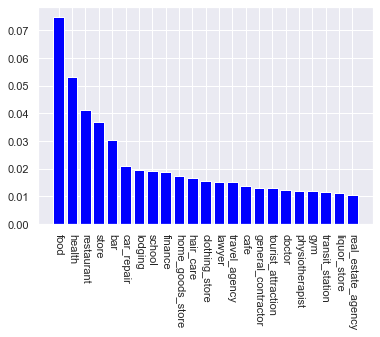

<Figure size 72000x72000 with 0 Axes>

In [32]:
# Here I show the prority of every attribute
# I drop all the arribute of time because we only focus on the geo info
# But if you want ,you could also print them to underline which time would be more busy.

temp = random_forest_weight.sort_values('weight',ascending=False)
temp = temp[temp['weight']>=0.01]
temp = temp.drop(index=temp[temp['attributes'].isin({14,13,12,15,11,16,19,10,9,20,17,8,18})].index)
name_list = list(temp['attributes'])
num_list = list(temp['weight'])
plt.bar(range(len(num_list)), num_list,color='blue',tick_label=name_list)
plt.xticks(rotation=270) 
plt.figure(figsize=(1000,1000))
plt.show()



In [33]:
# for i in range(24):
#     df_now_using = df_transaction_start_hour_count[df_transaction_start_hour_count['start_hour']==(i)]
#     df_now_using = df_now_using.merge(df_parkomat_count,how='inner',on = 'parkomat_id')
#     train = df_now_using.drop(
#         columns=['start_hour',
#         'parkomat_id',
#         'id',
#         'counts',
#         'lng',
#         'lat',
#         'sublocality_level_2',
#         'sublocality_level_1',
#         'sublocality',
#         'establishment',
#         'point_of_interest',
#         'wkb_geometry'])
#     target = df_now_using['counts']
#     X,X_test, y, y_test = sklearn.model_selection.train_test_split(train,target,train_size = int(len(train)*0.9),random_state = 0)
#     print("start:",i)
#     randomForest(X,y,X_test,y_test)



In [34]:
# for i in range(24):
#     df_now_using = df_transaction_leave_hour_count[df_transaction_leave_hour_count['leave_hour']==(i)]
#     df_now_using = df_now_using.merge(df_parkomat_count,how='inner',on = 'parkomat_id')
#     train = df_now_using.drop(
#         columns=['leave_hour',
#         'parkomat_id',
#         'id',
#         'counts',
#         'lng',
#         'lat',
#         'sublocality_level_2',
#         'sublocality_level_1',
#         'sublocality',
#         'establishment',
#         'point_of_interest',
#         'wkb_geometry'])
#     target = df_now_using['counts']
#     X,X_test, y, y_test = sklearn.model_selection.train_test_split(train,target,train_size = int(len(train)*0.9),random_state = 0)
#     print("start:",i)
#     randomForest(X,y,X_test,y_test)


In [35]:
## =========DRAWING MAPS===================================
# # # test = literal_eval(df_parking[0:1]['wkb_geometry'])
# # t = (df_parking.loc[6581,['wkb_geometry']])['wkb_geometry']
# # point_around = df_google_map
# # point_around = point_around.drop(index=point_around.index)
# # for point1 in t:
# #     for point2 in df_google_map:
# # len(df_parkomat)
# #1602
# df_parkomat.head()
# df_parkomat['wkb_geometry'][1]
# # df_parkomat['lat'] = df_parkomat['wkb_geometry'].apply(lambda x: x.)
# import re
# t = re.split('POINT \(| |\)',df_parkomat['wkb_geometry'][1])[1:3]

# def strpoint_to_list(str):
#     temp_list=[]

# df_parking = pd.read_csv("taelling_p_pladser.csv", parse_dates=['aar_mdr'])
# df_parking = df_parking[(df_parking['aar_mdr']>='2012') & (df_parking['aar_mdr']<='2021')]
# df_parking = df_parking.sort_values(by='aar_mdr')
# # df_parking = df_parking[df_parking.aar_mdr != '201  405']
# df_parking['aar_mdr'] = df_parking['aar_mdr'].apply(lambda x: str(x)).apply(lambda x : x[:4]+'/'+x[4:])
# def format_geo(x):
#     x = str(x)
#     for i in ")(,":
#         x = x.replace(i,'')
#     x = x.split()[1:]
#     locations = []
#     for i in range(0,len(x),2):
#         locations.append(x[i:i+2])
#     return locations
# df_parking['wkb_geometry'] = df_parking['wkb_geometry'].apply(format_geo)

In [36]:
# import folium
# cp_map = folium.Map(location=[55.6760968, 12.5683371], zoom_start=13)
# for i in range(len(df_google_map)):
#     folium.Circle(
#         radius=1,
#         location=[df_google_map.loc[i,'lat'], df_google_map.loc[i,'lng']],
#         color="blue",
#         fill=True
#     ).add_to(cp_map)

# for i in range(len(df_parkomat)):
#     t = re.split('POINT \(| |\)',df_parkomat['wkb_geometry'][i])[1:3]
#     # folium.Circle(
#     #     radius=3,
#     #     location=[t[1], t[0]],
#     #     color="green",
#     #     fill=True
#     # ).add_to(cp_map)
#     folium.Marker(
#     location=[t[1], t[0]],
#     icon=folium.Icon(color="green")
# ).add_to(cp_map)



# df_201703 = df_parking[df_parking['aar_mdr'] == '2017/03']
# df_201703 = df_201703.dropna(subset=['wkb_geometry'])
# df_201703 = df_201703[df_201703['wkb_geometry'].apply(lambda x: len(x)) > 0]
# df_201703 = df_201703[df_201703['lovlig_p_kl_12']!=0]
# df_201703 = df_201703[df_201703['lovlig_p_kl_17']!=0]
# df_201703 = df_201703[df_201703['lovlig_p_kl_22']!=0]
# df_201703 = df_201703.drop_duplicates(subset=['taelle_id'], keep='first')

# import colorsys

# for i, row in df_201703.iterrows():
#     points = []
#     if len(row['wkb_geometry']) == 0:
#         continue
#     rate = int(row['belaegning_kl_12_pct'])
#     if rate > 100:
#         rate = 100
#     rgb = colorsys.hsv_to_rgb((100 -rate)/ 300., 1.0, 1.0)
#     color = '#%02x%02x%02x' % tuple([round(255*x) for x in rgb])
#     for location in row['wkb_geometry']:
#         point = []
#         point.append(float(location[1]))
#         point.append(float(location[0]))
#         points.append(point)
#     popup = row['vejnavn'] + '-' + str(rate) + '%'
#     folium.PolyLine(points, color=color, popup=popup).add_to(cp_map)


# cp_map

In [37]:
# cp_map = folium.Map(location=[55.6760968, 12.5683371], zoom_start=13)
# datetime_using = pd.to_datetime("2015-05-21 00:00:00")
# df_transaction_temp = df_transaction_hour_series[df_transaction_hour_series['datetime'].dt.date==datetime_using].merge(df_parkomat_count,how='inner',left_on='Automat',right_on='parkomat_id')
# df_transaction_temp = df_transaction_temp[0:10000]
# # df_transaction_temp['string_time'] = df_transaction_temp['datetime'].apply(lambda x: x.strftime("%Y-%m-%dT%H:%M:%S")

# # Lon, Lat order.
# # "dates": [str(i.datetime), str(i.datetime+pd.Timedelta(1,'h'))],
# points = [
#     {
#         "coordinates": [
#             i.lat,i.lng
#         ],
#         "dates": [i.datetime.strftime("%Y-%m-%dT%H:%M:%S"),(i.datetime+pd.Timedelta(1,'h')).strftime("%Y-%m-%dT%H:%M:%S")],
#         "color": '#%02x%02x%02x' % tuple([round(255*x) for x in ((colorsys.hsv_to_rgb(((100 -i.rate*2) if i.rate <=50 else 0)/ 300., 1.0, 1.0)))]),
#     }
#     for index, i in df_transaction_temp.iterrows()
# ]

# features = [
#     {
#         "type": "Feature",
#         "geometry": {
#             "type": "Point",
#             "coordinates": point["coordinates"],
#         },
#         "properties": {
#             "times": point["dates"],
#             "style": {
#                 "color": point["color"],
#             },
#         },
#     }
#     for point in points
# ]

# plugins.TimestampedGeoJson(
#     {
#         "type": "FeatureCollection",
#         "features": features,
#     },
#     period="PT1H",
#     add_last_point=True,
# ).add_to(cp_map)
# cp_map.save('xxx.html')
# # cp_map
